In [15]:
#from google.colab import drive
#drive.mount('/content/drive')

In [16]:
#!unzip /content/drive/MyDrive/ColabNotebooks/data.zip # Décompresser votre base de données à partir du Drive
#!unzip /content/drive/MyDrive/IA_Dec_2022/data.zip # Décompresser votre base de données à partir du Drive

In [17]:
import os
print('total Validation COVID-19 images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('/home/maliki/master/cyber m1/machine learning/data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [18]:
train_dir = '/home/maliki/master/cyber m1/machine learning/data/TRAIN'
validation_dir = '/home/maliki/master/cyber m1/machine learning/data/VAL'

In [19]:
from tensorflow.keras.models import Sequential
from keras import layers # n'est plus utile

from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
#Dense ==> fully connected
#Conv2D ==> convolution
#Flatten ==> transfert entre Couche de convolution et fullyconnected
#MaxPooling2D ==> pooling (Max ou average)

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# des commandes utiles pour des callbacks (avoir un retour pendant l'execution)

# socle sur le quel on va installer les différentes couches de l'architecture
model = Sequential()

model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.75) )# supprimer aléatoirement un certain nombre de neuronne de temps à autres
model.add(layers.Dense(256, activation='sigmoid'))#sigmoid au lieu de relu
#model.add(layers.Dense(1, activation='sigmoid'))

# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
model.add(layers.Dense(2, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 256)     7168      
                                                                 
 conv2d_4 (Conv2D)           (None, 223, 223, 128)     295040    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)           

In [21]:
from keras.preprocessing.image import ImageDataGenerator
# pour générer des images synthétique dans la RAM pour l'apprentissage (non disponibles sur le disque)

train_datagen = ImageDataGenerator(rescale=1./255, # normalisation
                                   rotation_range=10, # 10 est le degré de rotation
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True, # flip est comme un effet miroir
                                   fill_mode='nearest') # nearest est la méthode d'interpolation

Val_datagen = ImageDataGenerator(rescale=1./255) # juste la normalisation

train_generator = train_datagen.flow_from_directory(  #application du générateur sur la base initiale
    train_dir,
    target_size=(227, 227),
    batch_size=2, # mise à jour toutes les deux images
    #class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=2,
    # class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [22]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['mse'])#On à changé adam en sgd (gradient descent) et metrics avec mae (Erreur absolue moyenne (Mean Absolute Error)) et on à augmenté l'accuracy de 75% à 86-96% et rarement en dessous de 70%
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25


20/20 [==============================] - 2s 51ms/step - loss: 0.7344 - mse: 0.2670 - val_loss: 0.7046 - val_mse: 0.2558 - lr: 0.0100
Epoch 2/25
20/20 [==============================] - 1s 43ms/step - loss: 0.6818 - mse: 0.2397 - val_loss: 0.7579 - val_mse: 0.2805 - lr: 0.0100
Epoch 3/25
20/20 [==============================] - 1s 43ms/step - loss: 0.7704 - mse: 0.2845 - val_loss: 0.6539 - val_mse: 0.2309 - lr: 0.0100
Epoch 4/25
20/20 [==============================] - 1s 42ms/step - loss: 0.6853 - mse: 0.2448 - val_loss: 0.6166 - val_mse: 0.2136 - lr: 0.0100
Epoch 5/25
20/20 [==============================] - 1s 42ms/step - loss: 0.6701 - mse: 0.2365 - val_loss: 0.6475 - val_mse: 0.2337 - lr: 0.0100
Epoch 6/25
20/20 [==============================] - 1s 42ms/step - loss: 0.7328 - mse: 0.2671 - val_loss: 0.5976 - val_mse: 0.2026 - lr: 0.0100
Epoch 7/25
20/20 [==============================] - 1s 43ms/step - loss: 0.6445 - mse: 0.2292 - val_loss: 0.5031 - val_mse: 0.1603 - lr: 0.0100
Epo

In [23]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/home/maliki/master/cyber m1/machine learning/data/TEST/COVID-19.jpeg'

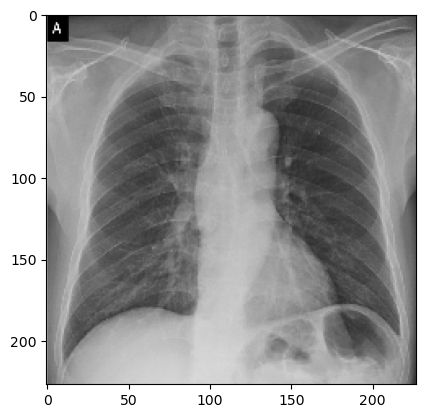

In [25]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()

In [26]:
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)

1/1 [==============================] - 0s 59ms/step


In [27]:
print(score)

[[0.93664056 0.0633595 ]]


**En cas d'une classification binaire**

In [28]:
# seulement dans le cas d'une classification binaire

print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# ou bien toujours en cas d'une classification binaire

if score < 0.5:
  print("covid-19")
else:
  print('Healthy')

Healthy
